In [1]:
import pandas as pd

In [2]:
dfclientes = pd.read_excel('caso_estudo.xlsx', sheet_name = 'clientes')
dflojas = pd.read_excel('caso_estudo.xlsx', sheet_name = 'lojas')
dfprodutos = pd.read_excel('caso_estudo.xlsx', sheet_name = 'produtos')
dfpagamentos = pd.read_excel('caso_estudo.xlsx', sheet_name = 'pagamentos')
dfvendas = pd.read_excel('caso_estudo.xlsx', sheet_name = 'vendas')

In [3]:
dfclientes.isnull().sum()

id         0
nome       4
sexo       4
dt_nasc    4
dtype: int64

In [4]:
dfclientes[dfclientes.isnull().T.any()]

,id,nome,sexo,dt_nasc
263,264,NaN,F,7/29/1997
264,265,NaN,M,2/7/1979
268,269,NaN,F,NaN
269,270,NaN,M,NaN
276,277,Brenda Santos,F,NaN
282,283,Amanda Barros,F,NaN
287,288,Victor Ribeiro,NaN,12/17/1974
290,291,Clara Pinto,NaN,12/25/1980
294,295,Tiago Lima,NaN,7/26/1973
301,302,Guilherme Cardoso,NaN,3/9/1998


# DATA CLEANNING #

## Dados Nulos

In [5]:
dfclientes.loc[dfclientes.nome.isnull(), 'nome']= 'sem nome'
dfclientes.loc[dfclientes.sexo.isnull(), 'sexo']= 'o'
dfclientes.loc[dfclientes.dt_nasc.isnull(), 'dt_nasc']= '1/1/2020'

# Outliers

In [6]:
dfprodutos.loc[9,'valor'] = dfprodutos.valor[9]/10000

In [7]:
dfprodutos

,id,produto,valor
0,1,mouse,20.0000
1,2,teclado,30.0000
2,3,laptop básico,2300.0000
3,4,laptop gamer,5300.0000
4,5,monitor,1500.0000
5,6,impressora,700.0000
6,7,carregador,150.0000
7,8,cadeira,540.0000
8,9,mesa,860.0000
9,10,xxx-231a,321.1352


# Consistencia

In [8]:
dfvendas[~dfvendas.id_cliente.isin(dfclientes.id)]

,id,id_cliente,id_loja,id_produto,dt_venda


# Buscando dados Duplicados

In [9]:
dfclientes[dfclientes.nome.duplicated()]


,id,nome,sexo,dt_nasc
79,80,Anna Melo,F,8/10/1999
96,97,Beatrice Goncalves,F,11/22/1964
138,139,Kauê Araujo,M,5/31/1974
139,140,Leonor Sousa,F,8/2/1981
154,155,Luis Rodrigues,M,7/3/1973
...,...,...,...,...
986,987,Beatriz Cardoso,F,7/17/1984
990,991,Diogo Melo,M,7/24/2001
993,994,Eduardo Costa,M,12/18/1963
996,997,Laura Oliveira,F,6/15/1979


In [10]:
dfclientes.drop('id', axis = 1).duplicated().sum()

0

In [11]:
dfprodutos.produto.duplicated().sum()

0

In [12]:
dfvendas.duplicated().sum()

0

In [13]:
dfvendas[dfvendas.drop('id', axis =1).duplicated()]

,id,id_cliente,id_loja,id_produto,dt_venda
496,497,559,2,5,2018-06-22


# Formatando Dados

In [14]:
dfclientes.dt_nasc = pd.to_datetime(dfclientes.dt_nasc, format = '%m/%d/%Y')

In [15]:
dfclientes

,id,nome,sexo,dt_nasc
0,1,Lavinia Sousa,F,1975-05-02
1,2,Caio Pereira,M,1978-04-16
2,3,Júlio Azevedo,M,1952-11-04
3,4,Sarah Goncalves,F,1937-02-24
4,5,Gabrielle Martins,F,1953-05-06
...,...,...,...,...
995,996,Ágatha Ribeiro,F,1946-02-08
996,997,Laura Oliveira,F,1979-06-15
997,998,Lara Oliveira,F,1946-03-15
998,999,Julian Cunha,M,1994-06-20


# Definindo Index

In [16]:
dfclientes = dfclientes.set_index('id')

In [17]:
dfpagamentos = dfpagamentos.set_index('id')

In [18]:
dfvendas = dfvendas.set_index('id')

In [19]:
dflojas = dflojas.set_index('id')

In [20]:
dfprodutos = dfprodutos.set_index('id')

# Data Fusion

In [21]:
df = dfvendas.join(dfclientes.add_prefix('cliente_'), on ='id_cliente')

In [22]:
df

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc
id,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31
3,374,7,8,2018-01-04,André Alves,M,1962-08-03
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15
...,...,...,...,...,...,...,...
2996,671,3,7,2020-09-27,Ana Goncalves,F,1999-10-31
2997,586,8,3,2020-09-27,Aline Pinto,F,1994-03-29
2998,731,2,4,2020-09-27,Otávio Silva,M,1986-05-04


In [23]:
df = df.join(dflojas.add_prefix('loja_'), on = 'id_loja')

In [24]:
df = df.join(dfprodutos.add_prefix('prod_'), on = 'id_produto')

In [25]:
df

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,loja_cidade,prod_produto,prod_valor
id,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0
...,...,...,...,...,...,...,...,...,...,...
2996,671,3,7,2020-09-27,Ana Goncalves,F,1999-10-31,Curitiba,carregador,150.0
2997,586,8,3,2020-09-27,Aline Pinto,F,1994-03-29,Brasília,laptop básico,2300.0
2998,731,2,4,2020-09-27,Otávio Silva,M,1986-05-04,Rio de Janeiro,laptop gamer,5300.0


In [26]:
df = df.join(dfpagamentos.set_index('id_venda'))

In [27]:
df

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,loja_cidade,prod_produto,prod_valor,dt_pgto
id,,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0,2018-01-24
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0,2018-02-17
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0,2018-02-14
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0,NaT
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0,2018-01-23
...,...,...,...,...,...,...,...,...,...,...,...
2996,671,3,7,2020-09-27,Ana Goncalves,F,1999-10-31,Curitiba,carregador,150.0,2020-10-17
2997,586,8,3,2020-09-27,Aline Pinto,F,1994-03-29,Brasília,laptop básico,2300.0,2020-10-02
2998,731,2,4,2020-09-27,Otávio Silva,M,1986-05-04,Rio de Janeiro,laptop gamer,5300.0,NaT


In [28]:
df.isnull().sum()

id_cliente           0
id_loja              0
id_produto           0
dt_venda             0
cliente_nome         0
cliente_sexo         0
cliente_dt_nasc      0
loja_cidade          0
prod_produto         0
prod_valor           0
dt_pgto            928
dtype: int64

In [29]:
df.loc[df.cliente_sexo.isnull(), 'cliente_sexo']= 'o'
df.loc[df.cliente_dt_nasc.isnull(), 'cliente_dt_nasc']= '1/1/2020'

In [30]:
df.isnull().sum()

id_cliente           0
id_loja              0
id_produto           0
dt_venda             0
cliente_nome         0
cliente_sexo         0
cliente_dt_nasc      0
loja_cidade          0
prod_produto         0
prod_valor           0
dt_pgto            928
dtype: int64

# Feature Engineering

In [31]:
df

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,loja_cidade,prod_produto,prod_valor,dt_pgto
id,,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04 00:00:00,Palmas,laptop básico,2300.0,2018-01-24
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31 00:00:00,Palmas,laptop básico,2300.0,2018-02-17
3,374,7,8,2018-01-04,André Alves,M,1962-08-03 00:00:00,Salvador,cadeira,540.0,2018-02-14
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05 00:00:00,Belo Horizonte,laptop básico,2300.0,NaT
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15 00:00:00,Palmas,mouse,20.0,2018-01-23
...,...,...,...,...,...,...,...,...,...,...,...
2996,671,3,7,2020-09-27,Ana Goncalves,F,1999-10-31 00:00:00,Curitiba,carregador,150.0,2020-10-17
2997,586,8,3,2020-09-27,Aline Pinto,F,1994-03-29 00:00:00,Brasília,laptop básico,2300.0,2020-10-02
2998,731,2,4,2020-09-27,Otávio Silva,M,1986-05-04 00:00:00,Rio de Janeiro,laptop gamer,5300.0,NaT


In [32]:
df['pago'] = 1

In [33]:
df

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,loja_cidade,prod_produto,prod_valor,dt_pgto,pago
id,,,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04 00:00:00,Palmas,laptop básico,2300.0,2018-01-24,1
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31 00:00:00,Palmas,laptop básico,2300.0,2018-02-17,1
3,374,7,8,2018-01-04,André Alves,M,1962-08-03 00:00:00,Salvador,cadeira,540.0,2018-02-14,1
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05 00:00:00,Belo Horizonte,laptop básico,2300.0,NaT,1
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15 00:00:00,Palmas,mouse,20.0,2018-01-23,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2996,671,3,7,2020-09-27,Ana Goncalves,F,1999-10-31 00:00:00,Curitiba,carregador,150.0,2020-10-17,1
2997,586,8,3,2020-09-27,Aline Pinto,F,1994-03-29 00:00:00,Brasília,laptop básico,2300.0,2020-10-02,1
2998,731,2,4,2020-09-27,Otávio Silva,M,1986-05-04 00:00:00,Rio de Janeiro,laptop gamer,5300.0,NaT,1


In [34]:
df.loc[df.dt_pgto.isnull(), 'pago'] = 0

In [35]:
df['temp_pago'] = (df.dt_pgto - df.dt_venda).dt.days

In [36]:
df

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,loja_cidade,prod_produto,prod_valor,dt_pgto,pago,temp_pago
id,,,,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04 00:00:00,Palmas,laptop básico,2300.0,2018-01-24,1,20.0
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31 00:00:00,Palmas,laptop básico,2300.0,2018-02-17,1,44.0
3,374,7,8,2018-01-04,André Alves,M,1962-08-03 00:00:00,Salvador,cadeira,540.0,2018-02-14,1,41.0
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05 00:00:00,Belo Horizonte,laptop básico,2300.0,NaT,0,NaN
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15 00:00:00,Palmas,mouse,20.0,2018-01-23,1,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,671,3,7,2020-09-27,Ana Goncalves,F,1999-10-31 00:00:00,Curitiba,carregador,150.0,2020-10-17,1,20.0
2997,586,8,3,2020-09-27,Aline Pinto,F,1994-03-29 00:00:00,Brasília,laptop básico,2300.0,2020-10-02,1,5.0
2998,731,2,4,2020-09-27,Otávio Silva,M,1986-05-04 00:00:00,Rio de Janeiro,laptop gamer,5300.0,NaT,0,NaN


In [37]:
import numpy as np
np.floor((pd.to_datetime('today') - df.cliente_dt_nasc)/np.timedelta64(1,'Y'))

id
1       71.0
2       49.0
3       58.0
4       79.0
5       80.0
        ... 
2996    21.0
2997    27.0
2998    34.0
2999    54.0
3000    76.0
Name: cliente_dt_nasc, Length: 3000, dtype: float64

In [38]:
df['cliente_idade'] = np.floor((pd.to_datetime('today') - df.cliente_dt_nasc)/np.timedelta64(1,'Y'))

In [39]:
df

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,loja_cidade,prod_produto,prod_valor,dt_pgto,pago,temp_pago,cliente_idade
id,,,,,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04 00:00:00,Palmas,laptop básico,2300.0,2018-01-24,1,20.0,71.0
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31 00:00:00,Palmas,laptop básico,2300.0,2018-02-17,1,44.0,49.0
3,374,7,8,2018-01-04,André Alves,M,1962-08-03 00:00:00,Salvador,cadeira,540.0,2018-02-14,1,41.0,58.0
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05 00:00:00,Belo Horizonte,laptop básico,2300.0,NaT,0,NaN,79.0
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15 00:00:00,Palmas,mouse,20.0,2018-01-23,1,18.0,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,671,3,7,2020-09-27,Ana Goncalves,F,1999-10-31 00:00:00,Curitiba,carregador,150.0,2020-10-17,1,20.0,21.0
2997,586,8,3,2020-09-27,Aline Pinto,F,1994-03-29 00:00:00,Brasília,laptop básico,2300.0,2020-10-02,1,5.0,27.0
2998,731,2,4,2020-09-27,Otávio Silva,M,1986-05-04 00:00:00,Rio de Janeiro,laptop gamer,5300.0,NaT,0,NaN,34.0


# Analise

## Lojas e produtos que mais vendem

In [40]:
cida_mais = df.groupby('loja_cidade').count().prod_valor.sort_values(ascending = False)

In [41]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'vendas po loja')

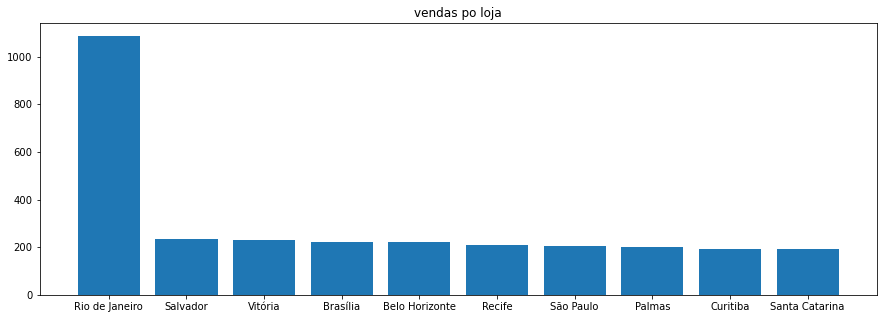

In [42]:
plt.figure(figsize =(15,5))
plt.bar(cida_mais.index, cida_mais.values)
plt.title('vendas po loja')

## Produtos que mais vendem

In [43]:
prod_mais = df.groupby('prod_produto').count().prod_valor.sort_values(ascending = False)

In [44]:
prod_mais

prod_produto
laptop básico    1395
teclado           204
impressora        191
monitor           187
xxx-231a          182
laptop gamer      180
mouse             172
mesa              171
carregador        164
cadeira           154
Name: prod_valor, dtype: int64

Text(0.5, 1.0, 'Produtos mais vendidos')

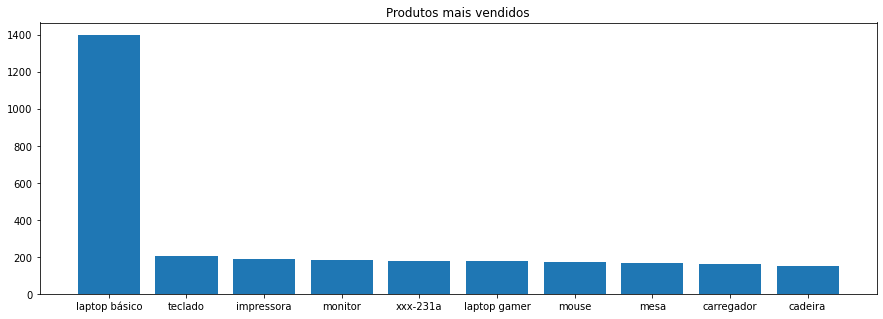

In [45]:
plt.figure(figsize =(15,5))
plt.bar(prod_mais.index, prod_mais.values)
plt.title('Produtos mais vendidos')

## Receita por loja

In [46]:
re_loja = df[['loja_cidade', 'prod_valor']].groupby('loja_cidade').sum().prod_valor.sort_values(ascending =False)

<BarContainer object of 10 artists>

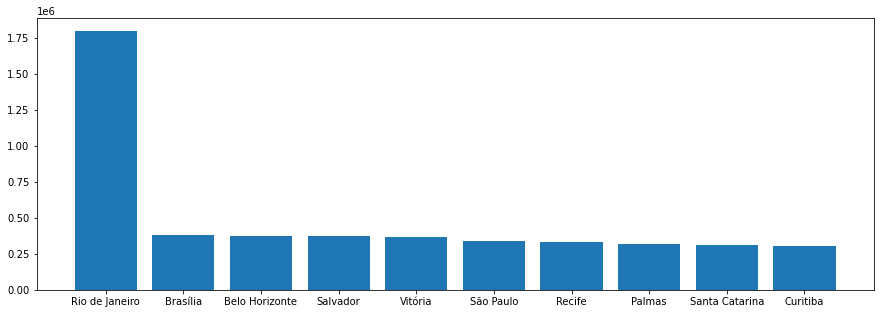

In [47]:
plt.figure(figsize = (15,5))
plt.bar(re_loja.index, re_loja.values)

## Receita por produto

In [48]:
rece_prod = df[['prod_produto', 'prod_valor']].groupby('prod_produto').sum().prod_valor.sort_values(ascending = False)

Text(0.5, 1.0, 'Receita por produto')

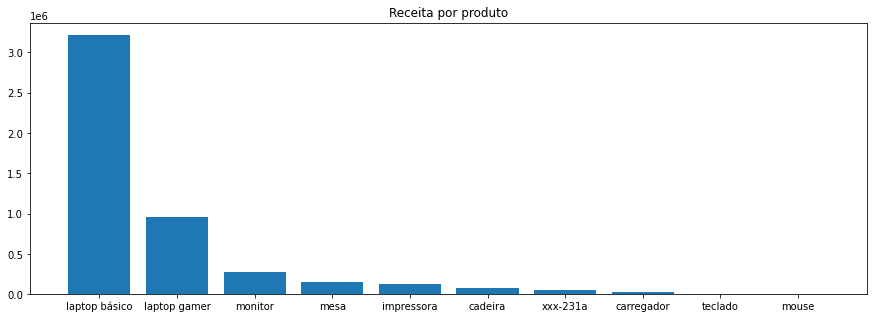

In [49]:
plt.figure(figsize = (15,5))
plt.bar(rece_prod.index, rece_prod.values)
plt.title('Receita por produto')

## Receita po cliente

In [50]:
rece_cliente = df[['cliente_nome','prod_valor']].groupby('cliente_nome').sum().prod_valor.sort_values(ascending = False)


Text(0.5, 1.0, 'Receita por cliente')

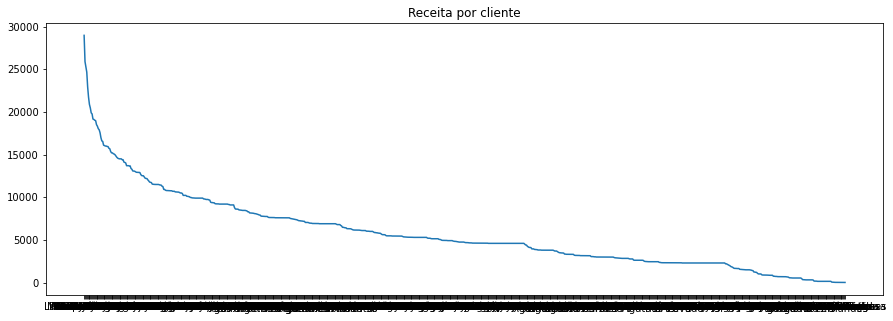

In [51]:
plt.figure(figsize = (15, 5))
plt.plot(rece_cliente.index, rece_cliente.values)
plt.title('Receita por cliente')

Text(0.5, 1.0, 'Receita por cliente')

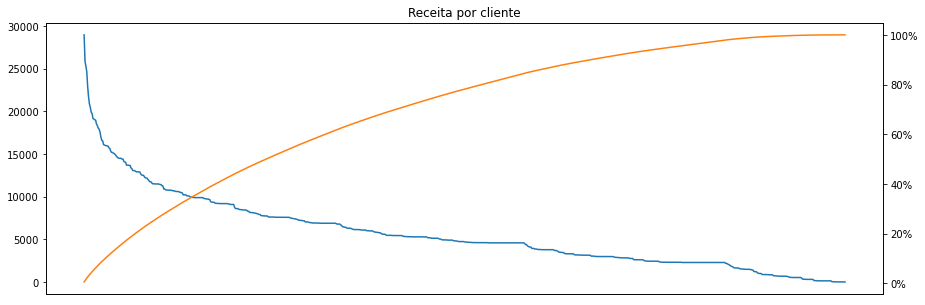

In [52]:
from matplotlib.ticker import PercentFormatter
fig , ax = plt.subplots(figsize = (15, 5))
ax.plot(rece_cliente.index, rece_cliente.values, color = 'C0')
ax2 = ax.twinx()
ax2.plot(rece_cliente.index, rece_cliente.values.cumsum()/rece_cliente.values.sum()*100 , color = 'C1')
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.axes.get_xaxis().set_visible(False)
ax.axes.get_xaxis().set_visible(False)
plt.title('Receita por cliente')

## Pareto

In [53]:
rece_dados = df[['prod_produto', 'prod_valor']].groupby('prod_produto').sum().prod_valor.sort_values(ascending = False)

Text(0.5, 1.0, 'Receita por aparelho')

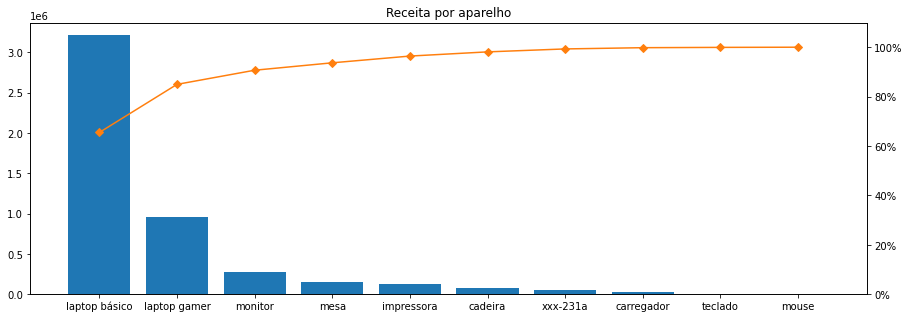

In [54]:
fig , ax = plt.subplots(figsize = (15, 5))
ax.bar(rece_dados.index, rece_dados.values, color = 'C0' )
ax2 = ax.twinx()
ax2.plot(rece_dados.index, rece_dados.values.cumsum()/rece_dados.values.sum()*100, color = 'C1', marker = 'D')
ax2.yaxis.set_major_formatter(PercentFormatter())
plt.ylim(0, 110)
plt.title('Receita por aparelho')

## Receita produto por loja

In [55]:
rece_prod = pd.DataFrame(columns = ('Loja', 'Produto', 'Receita'))

In [ ]:
for cidade in df.loja_cidade:
    for produtos in df.prod_produto:
        rece_prod = rece_prod.append({
            'Loja' : cidade,
            'Produto' : produtos,
            'Receita' : df.prod_valor[(df.loja_cidade == cidade) & (df.prod_produto == produtos)].sum()
        }, ignore_index = True)